In [2]:
%matplotlib inline

# Images are numpy arrays

Images are represented in ``scikit-image`` using standard ``numpy`` arrays.  This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as ``matplotlib`` and ``scipy``.

Let's see how to build a grayscale image as a 2D array:

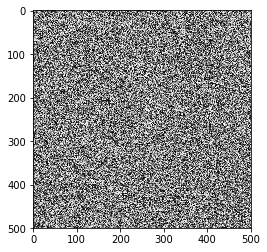

In [3]:
import numpy as np
from matplotlib import pyplot as plt

random_image = np.random.random([500, 500])

plt.imshow(random_image, cmap='gray');

The same holds for "real-world" images:

<class 'numpy.ndarray'> uint8 (303, 384)


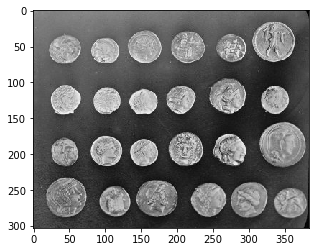

In [4]:
from skimage import data

coins = data.coins()

print(type(coins), coins.dtype, coins.shape)
plt.imshow(coins, cmap='gray');

A color image is a 3D array, where the last dimension has size 3 and represents the red, green, and blue channels:

Shape: (300, 451, 3)
Values min/max: 0 231


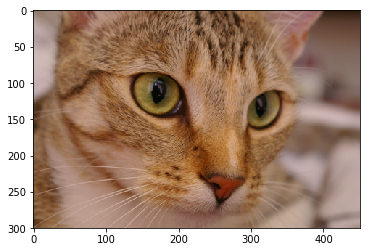

In [5]:
cat = data.chelsea()

print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat);

These are *just numpy arrays*. Making a red square is easy using just array slicing and manipulation:

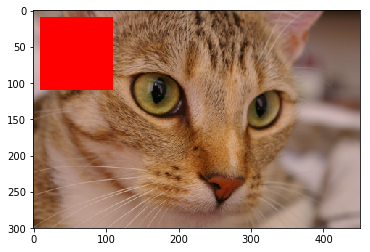

In [6]:
cat[10:110, 10:110, :] = [255, 0, 0]  # [red, green, blue]
plt.imshow(cat);

Images can also include transparent regions by adding a 4th dimension, called an *alpha layer*.

### Other shapes, and their meanings

|Image type|Coordinates|
|:---|:---|
|2D grayscale|(row, column)|
|2D multichannel|(row, column, channel)|
|3D grayscale|(plane, row, column)|
|3D multichannel|(plane, row, column, channel)|

## Displaying images using matplotlib

In [7]:
from skimage import data

img0 = data.chelsea()
img1 = data.rocket()

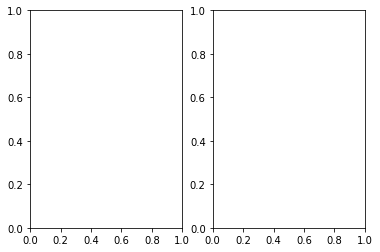

In [8]:
f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)

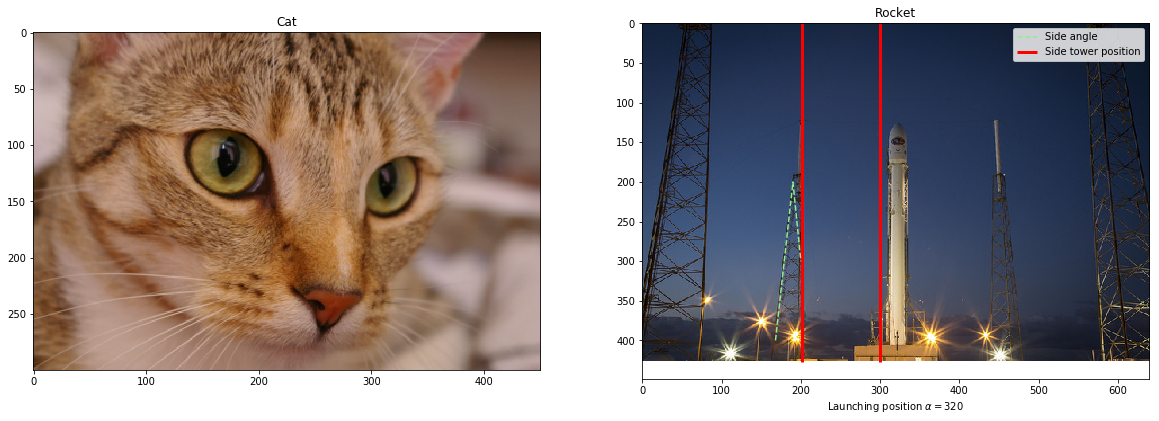

In [9]:
import matplotlib.pyplot as plt

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

ax0.imshow(img0)
ax0.set_title('Cat')

ax1.imshow(img1)
ax1.set_title('Rocket')
ax1.set_xlabel(r'Launching position $\alpha=320$')

ax1.vlines([202, 300], 0, img1.shape[0], color='red', linewidth=3, label='Side tower position')
ax1.plot([168, 190, 200], [400, 200, 300], color='lightgreen', linestyle='--', label='Side angle')

ax1.legend();

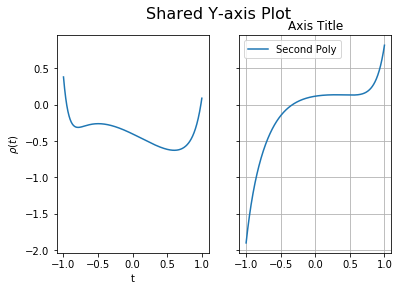

In [10]:
f, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

t = np.linspace(-1, 1, 500)
p0 = np.polynomial.Polynomial(np.random.random(15) - 0.5)
p1 = np.polynomial.Polynomial(np.random.random(15) - 0.5)

ax0.plot(t, p0(t))
ax0.set_xlabel('t')
ax0.set_ylabel(r'$\rho(t)$')

ax1.plot(t, p1(t), label='Second Poly')
ax1.legend()
ax1.grid()
ax1.set_title('Axis Title')

f.suptitle('Shared Y-axis Plot', fontsize=16);

Also see the [Matplotlib gallery](https://matplotlib.org/gallery/index.html#images-contours-and-fields) and [pyplot API](https://matplotlib.org/api/pyplot_summary.html).  The gallery has many examples; choose something close to what you want and customize.

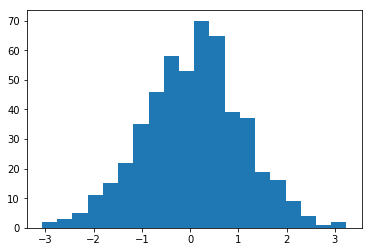

In [11]:
x = np.random.normal(0, 1, size=512)

plt.hist(x, bins='auto');  # Bin size determined automatically by NumPy, see
                           # np.histogram

## Data types and image values

In literature, one finds different conventions for representing image values:

```
  0 - 255   where  0 is black, 255 is white
  0 - 1     where  0 is black, 1 is white
```

``scikit-image`` supports both conventions--the choice is determined by the
data-type of the array.

E.g., here, I generate two valid images:

Linear0: float64 0.0 1.0
Linear1: uint8 0 255


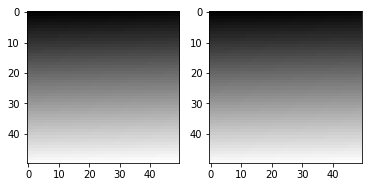

In [12]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

The library is designed in such a way that any data-type is allowed as input,
as long as the range is correct (0-1 for floating point images, 0-255 for unsigned bytes,
0-65535 for unsigned 16-bit integers).

This is achieved through the use of a few utility functions, such as ``img_as_float`` and ``img_as_ubyte``:

In [13]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_float = img_as_float(image)
image_ubyte = img_as_ubyte(image)

print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())

print("231/255 =", 231/255.)

type, min, max: float64 0.0 0.9058823529411765
type, min, max: uint8 0 231
231/255 = 0.9058823529411765


Your code would then typically look like this:

```python
def my_function(any_image):
   float_image = img_as_float(any_image)
   # Proceed, knowing image is in [0, 1]
```

We recommend using the floating point representation, given that
``scikit-image`` mostly uses that format internally.

## Image I/O

Mostly, we won't be using input images from the scikit-image example data sets.  Those images are typically stored in JPEG or PNG format.  Since scikit-image operates on NumPy arrays, *any* image reader library that provides arrays will do.  Options include matplotlib, pillow, imageio, imread, etc.

scikit-image conveniently wraps many of these in the `io` submodule, and will use whatever option is available:

<class 'numpy.ndarray'>
uint8
0 255


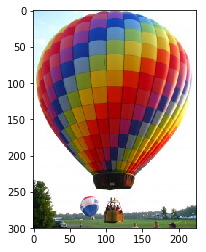

In [14]:
from skimage import io

image = io.imread('skimage/balloon.jpg')

print(type(image))
print(image.dtype)
print(image.min(), image.max())
plt.imshow(image);

We also have the ability to load multiple images, or multi-layer TIFF images:

In [15]:
ic = io.ImageCollection('skimage/*.png:skimage/*.jpg')

print('Type:', type(ic))

ic.files

Type: <class 'skimage.io.collection.ImageCollection'>


['skimage/balloon.jpg',
 'skimage/credit_card.jpg',
 'skimage/forest.jpg',
 'skimage/greenscreen.jpg',
 'skimage/superprom_prev.jpg',
 'skimage/terminator-vision.png']

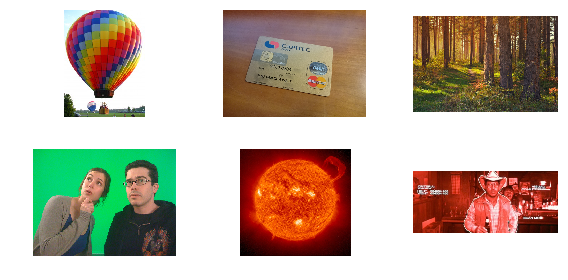

In [16]:
f, axes = plt.subplots(nrows=2, ncols=len(ic) // 2, figsize=(8, 4))

for i, image in enumerate(ic):
    axes.flat[i].imshow(image, cmap='gray')
    axes.flat[i].axis('off')
    
plt.tight_layout()

## Exercise

In the film industry, it is often necessary to impose actors on top of a rendered background.  To do that, the actors are filmed on a "green screen".  Here's an example shot (``images/greenscreen.jpg``):

<img src="skimage/greenscreen.jpg" width="300px"/>

Say we'd like to help these folks travel into a forest (``skimage/forest.jpg``):

<img src="skimage/forest.jpg" width="300px"/>

Can you transplant the foreground of the greenscreen onto the backdrop of the forest?

## Exercise

Complete the scatter plot exercise at http://www.scipy-lectures.org/intro/matplotlib/index.html#scatter-plots

In [78]:
actors = io.imread('skimage/greenscreen.jpg')
scene = io.imread('skimage/forest.jpg')

scene = scene[:actors.shape[0], :actors.shape[1]]

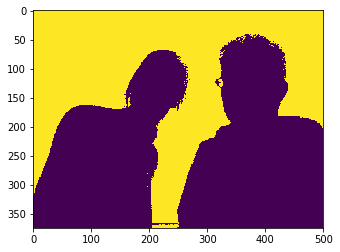

In [101]:
background = (actors[:, :, 0] < 50) & (actors[:, :, 1] > 70) & (actors[:, :, 2] < 150)

plt.imshow(background)

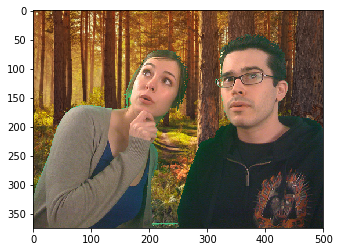

In [102]:
joined = actors.copy()

joined = np.where(background[:, :, None].repeat(3, axis=-1), scene, actors)

plt.imshow(joined)